In [1]:
import pandas as pd
import pandas_access as mdb
import datetime as dt
from datetime import datetime
import numpy as np

In [15]:
df = mdb.read_table("data/saleshist.mdb", "SALEHIST")

In [40]:
# NaN/ Zero only columns: COMMISION, ROW_DESC, TAX2, COL_INDEX, SHIP_NO, SITE (1 only)

# MOSTLY NAN columns: RETFLAG (1167 NOT NAN)(Y, N), CUST_NO (103378 NOT NAN)
# MOSTLY ZERO columns: DISCOUNT (72173 not NAN)

# has some NANs but mostly not: REG_ID (1 or 2) , VENDOR (Long list), TYPE (P,S,K), DESC (7706), SKU (4778), GROUP (33)

# 33k rows where PRICE != REGPRICE

# start with day of week, day of month, month, year, group, time of day, (cos day), (sin day), cost, 
# discount (yes or no), price, 

# which things are bought together?
# seasonality of items
# which vendor?

# what is TYPE?

# was there anything else significantly different between 2017 and 2018 otherthan the loss of the overpass?

# which products have the best ROI? (price - cost) AND how does that compare overall to profit?

796432

In [5]:
len(df[df.SITE != '1'])
len(df[~df.REG_ID.isna()])
df_smol.DATE[800000][:8].split("/")

NameError: name 'df_smol' is not defined

In [204]:
df.columns

Index(['INV_NO', 'SKU', 'QTY', 'CUST_NO', 'PRICE', 'TAX1', 'CLERK', 'DATE',
       'GROUP', 'REG_ID', 'DISCOUNT', 'DESC', 'COST', 'PAID', 'TIME', 'TYPE',
       'RETFLAG', 'REGPRICE', 'VENDOR'],
      dtype='object')

In [16]:
df.drop(["COMMISION", "ROW_DESC", "TAX2", "COL_INDEX", "SHIP_NO", "SITE"], axis=1, inplace=True)


In [17]:
df_smol = df.drop(["RETFLAG", "CUST_NO", "REG_ID", "CLERK", "TAX1", "PAID", "REGPRICE", "TYPE"], axis=1)


In [18]:
def date_func(df, col_as_str):
    #df_smol["month"], df_smol["day"], df_smol["year"] = df_smol["DATE"].apply(lambda x: x[:8].split("/"))
    yearmonthday = df[col_as_str].astype(str)
    ymd = yearmonthday.apply(lambda x: x[:8]).str.split("/")
    year = ymd.apply(lambda x: x[2])
    month = ymd.apply(lambda x: x[0])
    day = ymd.apply(lambda x: x[1])
    df["year"] = year
    df["month"] = month
    df["day"] = day
    return df

def weekday(df):
    lst = []
    for ix, row in df.iterrows():
        if row["year"][0] in ["0","1","2"]:
            year4 = int("20" + row["year"])
        else:
            year4 = int("19" + row["year"])
        month = int(row["month"])
        day = int(row["day"])
        dt_obj = dt.datetime(year4, month, day)
        weekday = datetime.date(dt_obj).weekday()
        lst.append(weekday)
    df["weekday"] = lst
    return df

def century(year): 
    if year[0] in ["0","1","2"]:
        year4 = ("20" + year)
    else:
        year4 = ("19" + year)
    return year4

def plot_sku(sku):
    new_df = df_smol[df_smol["SKU"] == sku]
    years = new_df.year.unique()
    yearly = new_df.groupby("year")["profit"].sum()
    profits = yearly.values
    #yearly.plot.bar(x = "year", y = "profit") 
    df = pd.DataFrame({'year': years,'profit':profits})
    desc = list(new_df['DESC'])[0]
    ax = df.plot.bar(x='year', y='profit', legend=True, title=desc, rot=90);

In [9]:
df = date_func(df, "DATE")
df = weekday(df)
df["profit"] = df["QTY"] * (df["PRICE"] - df["COST"])
df["year"] = df["year"].apply(lambda x: century(x))
df.drop(["DATE"],axis=1, inplace=True)

In [10]:
df.to_pickle("data/df.pkl")

In [19]:
df_smol = date_func(df_smol, "DATE")
df_smol = weekday(df_smol)

In [20]:
df_smol["profit"] = df_smol["QTY"] * (df_smol["PRICE"] - df_smol["COST"])
df_smol["year"] = df_smol["year"].apply(lambda x: century(x))
df_smol.drop(["DATE"],axis=1, inplace=True)

In [21]:
values = [106185, 93482, 93869,97286, 120934, 181260, 136056 ]
#df_smol['weekday'].value_counts().plot.bar()

df = pd.DataFrame({'day of week':[0,1,2,3,4,5,6], 'items sold per day':values})
ax = df.plot.bar(x='day of week', y='items sold per day', rot=0)

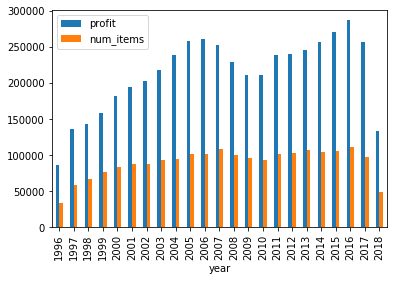

In [83]:
# try grouping by day, and then this (so you get an average
# per day profit)

# group by invoice first. - make new column with # items per inv

by_year = df_smol.groupby(["year"], axis=0).agg(
profit=pd.NamedAgg(column='profit', aggfunc=sum),

num_items=pd.NamedAgg(column='QTY', aggfunc=sum))

by_year.plot.bar();

In [67]:
yr_2018 = df_smol[df_smol["year"] == "2018"]
yr_2018.groupby("month").sum()


# could predict the rest of 2018 and then check to see if I was right!


,QTY,PRICE,DISCOUNT,COST,weekday,profit
month,,,,,,
01,6206.60,13031.92,5259.300,4521.90,9365,17054.8700
02,6712.00,13169.72,6999.500,4536.56,10068,18070.2980
03,7956.85,16260.88,7396.500,5493.12,13086,21508.0670
04,6242.75,13875.89,6508.400,4784.71,10176,17394.1800
05,6604.00,14212.31,5294.031,4891.66,9822,18598.8385
06,6735.88,14433.63,4524.000,4828.41,10493,18759.9718
07,6703.10,14580.04,4285.000,5139.01,9706,18771.3375
08,1309.90,2820.41,935.000,1065.17,2018,3329.6710


In [291]:
# plot income by GROUP
# column with total $ per row
# group by GROUP and sum



In [84]:
# GROUP BY INV_NO, sum $ and items
df_smol.head()

,INV_NO,SKU,QTY,PRICE,GROUP,DISCOUNT,COST,TIME,VENDOR,year,month,day,weekday,profit
0,1,1540,0.25,18.4,TEA,0.0,6.15,11:04,S&V,1996,05,05,6,3.0625
1,1,1558,0.25,39.0,TEA,0.0,13.00,11:04,S&V,1996,05,05,6,6.5000
2,1,1518,0.25,21.0,TEA,0.0,6.95,11:04,BWT,1996,05,05,6,3.5125
3,2,1192,1.00,26.0,ACC,0.0,12.50,11:28,WAC,1996,05,05,6,13.5000
4,3,1697,1.00,96.0,POT,0.0,48.00,11:39,KSO,1996,05,05,6,48.0000


In [89]:
len(df_smol["SKU"].value_counts())

4778

In [124]:
group_year = df_smol.drop(["PRICE", "DISCOUNT", "COST", "weekday"], axis=1).groupby("year")["profit"].idxmax()

year.iloc[group_year][["year", "GROUP", "profit"]]


In [135]:
year = pd.DataFrame(df_smol.groupby("year"))
len(year)

23

In [143]:
year_group = df_smol.drop(["PRICE", "DISCOUNT", "COST", "weekday"], axis=1).groupby(["year", "GROUP"])["profit"].sum()



210520.68350000549

In [188]:
year_group.name


'profit'

In [196]:
years = df_smol["year"].unique()
for year in years:
    maxi = year_group[year].nlargest(3)
    print(year, maxi)
        #year_group[year_group in maxi])

1996 GROUP
POT    40676.0400
TEA    20371.6395
ACC    14050.5000
Name: profit, dtype: float64
1997 GROUP
TEA    44843.3334
POT    43559.7100
ACC    14763.1600
Name: profit, dtype: float64
1998 GROUP
TEA    54411.0926
POT    38681.5500
ACC    16856.6900
Name: profit, dtype: float64
1999 GROUP
TEA    68881.2955
POT    37982.7400
ACC    16621.4000
Name: profit, dtype: float64
2000 GROUP
TEA    89438.032
POT    34280.920
ACC    20323.470
Name: profit, dtype: float64
2001 GROUP
TEA    101997.4264
POT     34479.1400
ACC     23329.7500
Name: profit, dtype: float64
2002 GROUP
TEA    109995.7498
POT     33287.8600
ACC     20658.3900
Name: profit, dtype: float64
2003 GROUP
TEA    128249.402
POT     31390.920
ACC     20649.620
Name: profit, dtype: float64
2004 GROUP
TEA    145039.133
POT     27542.460
ACC     24465.130
Name: profit, dtype: float64
2005 GROUP
TEA    160070.2225
POT     27792.1900
ACC     22873.2800
Name: profit, dtype: float64
2006 GROUP
TEA    162982.093
POT     27590.280
ACC    

In [294]:
# find SKU of most profitable per & most profitable overall & has this changed?

df_smol.SKU.value_counts()[:15]


1798             44233
SHIP/N           20820
2547             19068
BAG              18266
1797             17289
1799             14871
1548             14023
4975435581034    13509
1391             10687
3500              9495
1021              8707
4294              7126
4317              6704
2583              6386
3510              5868
Name: SKU, dtype: int64

In [304]:
# does price change directly change profit?


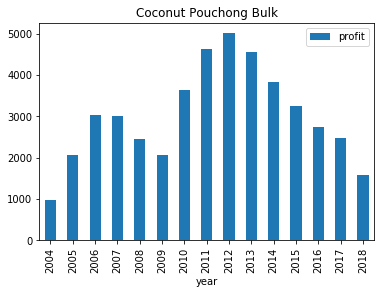

In [299]:
plot_sku('3510')

In [247]:
new_df = df_smol[df_smol["SKU"] == '1798']
years = new_df.year.unique()
yearly = new_df.groupby("year")["profit"].sum()
yearly.values, yearly

(array([  26.78, 1253.58, 1174.84, 1208.86, 1175.34, 1314.68, 1119.64,
        2407.2 , 3823.84, 4337.8 , 4480.48, 3769.01, 3201.6 , 2706.27,
        2703.61, 1879.15, 1895.56, 2718.99, 2667.68, 2693.73, 3314.41,
        2657.88, 1554.56]), year
 1996      26.78
 1997    1253.58
 1998    1174.84
 1999    1208.86
 2000    1175.34
 2001    1314.68
 2002    1119.64
 2003    2407.20
 2004    3823.84
 2005    4337.80
 2006    4480.48
 2007    3769.01
 2008    3201.60
 2009    2706.27
 2010    2703.61
 2011    1879.15
 2012    1895.56
 2013    2718.99
 2014    2667.68
 2015    2693.73
 2016    3314.41
 2017    2657.88
 2018    1554.56
 Name: profit, dtype: float64)

In [300]:
# if an sku differs from the mean by more than one std, plot it

In [313]:
clist = df_smol["DESC"].value_counts()
len(clist)

7706

In [329]:
zero_cost_list = list(df_smol[df_smol.COST == 0]["DESC"].unique())
negative_profit_list = list(df_smol[df_smol.profit < 0]["DESC"].unique())
zero_profit_list = list(df_smol[df_smol.profit == 0]["DESC"].unique())

In [353]:
profitable_1996 = df_smol[(df_smol["year"] == "1996") &(df_smol["profit"] > 0)]
grp = profitable_1996.groupby("SKU")["profit"].sum().sort_values(ascending=False)

In [354]:
grp

SKU
1799            4323.150
SHIP/T          2749.800
1548            1759.111
020658012323    1531.910
1349            1185.000
                  ...   
1422               0.750
2096               0.700
1665               0.600
1808               0.500
1584               0.500
Name: profit, Length: 679, dtype: float64

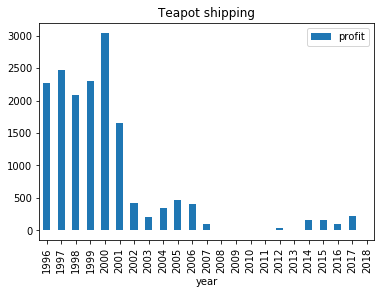

In [356]:
plot_sku("SHIP/T")

In [22]:
# profit up / down
# number items sold up / down
df_smol.groupby(["GROUP", "year"])["profit"].sum()


GROUP  year
999    1996      168.79
       1997      159.51
       1998      190.60
       1999       15.00
ACC    1996    14050.50
                 ...   
TTG    2014    10780.33
       2015    13295.88
       2016    15596.83
       2017    15209.37
       2018     6803.58
Name: profit, Length: 343, dtype: float64